# ***Student's Marks Prediction***

## Generating Data

In [49]:
import numpy as np
import pandas as pd

np.random.seed(42)

num_students = 1000

In [50]:
# Maths
# Define the ranges for each feature
preference_subject = (0,10)
complexity_of_test = (0,10)
peer_range = (0,10)
attendance_range = (5, 10)
study_hours_range = (0, 5)
homework_completion_range = (0, 10)
class_participation_range = (0, 10)
internal_exam_performance_range = (8, 20)
health_range = (5, 10)
motivation_range = (0, 10)
prone_to_distraction_range = (0, 10)
reading_materials_range = (0, 10)
ability_to_learn_range = (0, 10)
time_management_range = (3, 10)

In [51]:
# Generate random values for each feature
subject_preference = np.random.randint(0,10,size=num_students)
test_complexity = np.random.randint(0,10,size=num_students)
peer_type = np.random.randint(0,10,size=num_students)
attendance = np.random.randint(*attendance_range, size=num_students)
study_hours = np.round(np.random.uniform(*study_hours_range, size=num_students), 1)
homework = np.random.randint(*homework_completion_range, size=num_students)
class_participation = np.random.randint(*class_participation_range, size=num_students)
internal_exam = np.random.randint(*internal_exam_performance_range, size=num_students)
health = np.random.randint(*health_range, size=num_students)
motivation = np.random.randint(*motivation_range, size=num_students)
distraction = np.random.randint(*prone_to_distraction_range, size=num_students)
materials = np.random.randint(*reading_materials_range, size=num_students)
learning = np.random.randint(0,10,size=num_students)
time_management = np.random.randint(3,10,size=num_students)

## Create DataFrame

In [52]:

# Create a DataFrame with the generated data
data = {
    "Subject_Preference":subject_preference,
    "Test Complexity":test_complexity,
    "Peer_Type":peer_type,
    'Attendance': attendance,
    'Study_Hours': study_hours,
    'Homework_Completion': homework,
    'Class_Participation': class_participation,
    'Internal_Exam_Performance': internal_exam,
    'Health': health,
    'Motivation': motivation,
    'Prone_to_Distraction': distraction,
    'Reading_Materials': materials,
    'Ability_to_Learn': learning,
    'Time_Management': time_management,
}

df = pd.DataFrame(data)

# Display the DataFrame
df

,Subject_Preference,Test Complexity,Peer_Type,Attendance,Study_Hours,Homework_Completion,Class_Participation,Internal_Exam_Performance,Health,Motivation,Prone_to_Distraction,Reading_Materials,Ability_to_Learn,Time_Management
0,6,0,9,5,4.3,1,0,16,7,4,2,4,1,9
1,3,7,5,8,4.6,4,6,14,5,9,9,2,3,3
2,7,3,6,9,4.3,3,9,16,9,2,6,7,2,7
3,4,3,8,7,0.2,6,2,17,9,7,0,6,3,4
4,6,4,0,6,3.9,7,7,10,9,9,8,4,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9,2,4,5,0.6,0,0,19,9,2,7,5,4,4
996,9,6,4,9,0.6,0,7,12,7,9,9,1,4,9
997,7,4,0,7,4.1,0,2,16,8,4,3,6,4,5
998,1,1,8,5,4.6,7,5,14,7,2,3,8,6,8


In [53]:
def generate_marks(row):
    marks = (
    #Define relationship here
    row['Subject_Preference']*7 +
    row['Test Complexity'] * 3 +
    row['Peer_Type'] * 5 +
    row['Attendance'] * 6 +
    row["Study_Hours"] *15+
    row['Homework_Completion'] * 3+
    row["Class_Participation"] *7+
    row['Internal_Exam_Performance']*10+
    row["Health"] *6+
    row["Motivation"]*11+
    row["Prone_to_Distraction"]/10+
    row["Reading_Materials"]*5+
    row["Ability_to_Learn"]*8+
    row["Time_Management"]*7
    )
    return np.clip(marks, 300, 800)

df['Marks_Obtained'] = df.apply(generate_marks, axis=1).astype(int)

df

,Subject_Preference,Test Complexity,Peer_Type,Attendance,Study_Hours,Homework_Completion,Class_Participation,Internal_Exam_Performance,Health,Motivation,Prone_to_Distraction,Reading_Materials,Ability_to_Learn,Time_Management,Marks_Obtained
0,6,0,9,5,4.3,1,0,16,7,4,2,4,1,9,521
1,3,7,5,8,4.6,4,6,14,5,9,9,2,3,3,562
2,7,3,6,9,4.3,3,9,16,9,2,6,7,2,7,615
3,4,3,8,7,0.2,6,2,17,9,7,0,6,3,4,537
4,6,4,0,6,3.9,7,7,10,9,9,8,4,9,7,613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9,2,4,5,0.6,0,0,19,9,2,7,5,4,4,479
996,9,6,4,9,0.6,0,7,12,7,9,9,1,4,9,574
997,7,4,0,7,4.1,0,2,16,8,4,3,6,4,5,527
998,1,1,8,5,4.6,7,5,14,7,2,3,8,6,8,553


In [54]:
interval_limit = [300,400,500,600,700,800]
df["Interval"] = pd.cut(df["Marks_Obtained"], bins=interval_limit, labels=interval_limit[1:], right=True)


In [55]:
df.sample(5)

,Subject_Preference,Test Complexity,Peer_Type,Attendance,Study_Hours,Homework_Completion,Class_Participation,Internal_Exam_Performance,Health,Motivation,Prone_to_Distraction,Reading_Materials,Ability_to_Learn,Time_Management,Marks_Obtained,Interval
520,3,6,5,9,4.3,3,2,15,6,8,6,5,7,6,603,700
834,4,0,7,9,0.5,4,5,18,7,4,4,5,6,6,552,600
73,4,5,4,6,4.3,8,5,8,6,3,6,8,6,8,516,600
91,0,5,4,8,1.7,2,7,14,9,1,9,7,2,8,476,500
525,8,6,3,5,1.1,8,9,8,6,7,6,2,5,4,494,500


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt


600    465
500    367
700    121
400     43
800      4
Name: Interval, dtype: int64


<ipython-input-57-5f98457ffed3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=interval_counts.index, y=interval_counts, palette='viridis')


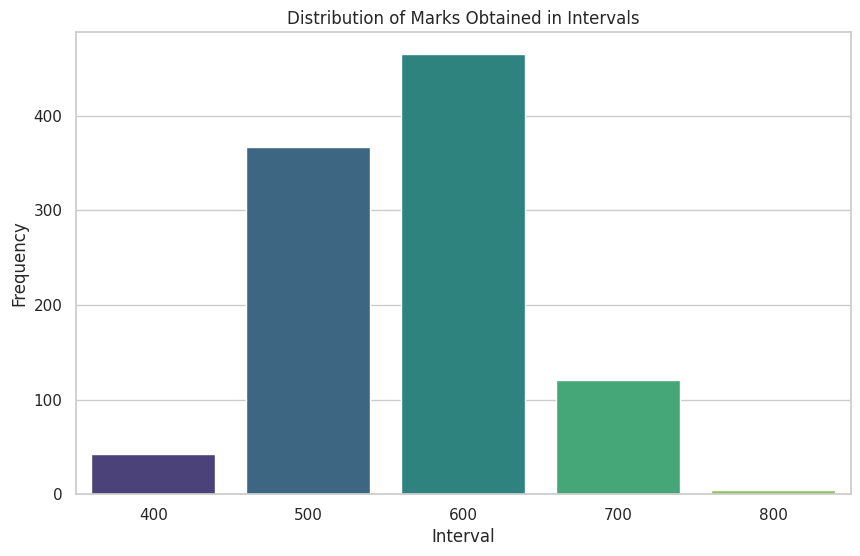

In [57]:
# Count the occurrences of each interval
interval_counts = df['Interval'].value_counts()
print(interval_counts)

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot a bar graph
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=interval_counts.index, y=interval_counts, palette='viridis')
plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.title('Distribution of Marks Obtained in Intervals')

# Show the plot
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

X = df.drop(["Marks_Obtained", "Interval"], axis=1)
y = df.Marks_Obtained.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 14), (800,), (200, 14), (200,))

In [59]:
X

,Subject_Preference,Test Complexity,Peer_Type,Attendance,Study_Hours,Homework_Completion,Class_Participation,Internal_Exam_Performance,Health,Motivation,Prone_to_Distraction,Reading_Materials,Ability_to_Learn,Time_Management
0,6,0,9,5,4.3,1,0,16,7,4,2,4,1,9
1,3,7,5,8,4.6,4,6,14,5,9,9,2,3,3
2,7,3,6,9,4.3,3,9,16,9,2,6,7,2,7
3,4,3,8,7,0.2,6,2,17,9,7,0,6,3,4
4,6,4,0,6,3.9,7,7,10,9,9,8,4,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9,2,4,5,0.6,0,0,19,9,2,7,5,4,4
996,9,6,4,9,0.6,0,7,12,7,9,9,1,4,9
997,7,4,0,7,4.1,0,2,16,8,4,3,6,4,5
998,1,1,8,5,4.6,7,5,14,7,2,3,8,6,8


In [60]:
y

array([521, 562, 615, 537, 613, 561, 493, 488, 540, 553, 519, 497, 552,
       470, 408, 471, 564, 559, 453, 489, 510, 466, 454, 592, 556, 428,
       419, 504, 547, 528, 607, 591, 559, 459, 506, 545, 486, 531, 493,
       477, 502, 448, 658, 398, 593, 523, 399, 622, 579, 469, 461, 522,
       472, 499, 599, 488, 530, 499, 611, 556, 541, 502, 420, 576, 361,
       478, 570, 663, 609, 538, 620, 602, 555, 516, 438, 591, 377, 482,
       515, 667, 595, 630, 459, 510, 600, 550, 378, 441, 428, 472, 490,
       476, 595, 565, 564, 487, 687, 494, 703, 466, 634, 376, 523, 602,
       523, 442, 555, 568, 444, 645, 501, 541, 422, 526, 524, 614, 513,
       601, 559, 495, 671, 635, 403, 541, 480, 404, 554, 617, 536, 584,
       433, 491, 379, 512, 361, 613, 670, 462, 545, 593, 493, 489, 583,
       506, 528, 608, 371, 443, 506, 592, 570, 533, 612, 510, 609, 675,
       415, 430, 515, 527, 455, 636, 551, 454, 572, 517, 430, 443, 479,
       491, 618, 478, 357, 493, 563, 392, 498, 449, 549, 536, 53

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for SVR and KNN)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# Define models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1)
lasso_reg = Lasso(alpha=1)
tree_reg = DecisionTreeRegressor(max_depth=5,random_state=42,min_samples_split=5)
knn_reg = KNeighborsRegressor()
svr_reg = SVR(kernel='linear')

# Train and evaluate each model
models = [linear_reg, ridge_reg, lasso_reg, tree_reg, knn_reg, svr_reg]

for model in models:
    # Train the model
    if model=="knn_reg" or model=="svr_reg":
      model.fit(scaled_X_train, y_train)
      y_train_pred = model.predict(scaled_X_train)
      y_test_pred = model.predict(scaled_X_test)
      # Use normal for other models
    else:
      model.fit(X_train, y_train)
      y_train_pred = model.predict(X_train)
      y_test_pred = model.predict(X_test)

     # Evaluate the model
    mse_train = mean_squared_error(y_train_pred,y_train)
    r2_train = r2_score(y_train_pred,y_train)
    mse_test = mean_squared_error(y_test_pred,y_test)
    r2_test = r2_score(y_test_pred,y_test)

    # Display results
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Train MSE: {mse_train}")
    print(f"Train R2: {r2_train}")
    print(f"Test MSE: {mse_test}")
    print(f"Test R2: {r2_test}")


Model: LinearRegression
Train MSE: 0.0754590542648756
Train R2: 0.9999843863950089
Test MSE: 0.07955957598310642
Test R2: 0.9999850775793357

Model: Ridge
Train MSE: 0.07578803469125493
Train R2: 0.9999843118671536
Test MSE: 0.08230884552807934
Test R2: 0.9999845554076228

Model: Lasso
Train MSE: 2.8942122692536874
Train R2: 0.9993775535883314
Test MSE: 3.310536791847793
Test R2: 0.9993544949192578

Model: DecisionTreeRegressor
Train MSE: 1581.2546519151072
Train R2: 0.5137181840574752
Test MSE: 2732.9854776527436
Test R2: 0.21237493438843413

Model: KNeighborsRegressor
Train MSE: 778.3930499999999
Train R2: 0.7428937163443343
Test MSE: 1235.391
Test R2: 0.5665409959370837

Model: SVR
Train MSE: 0.07705475491726722
Train R2: 0.9999840478644615
Test MSE: 0.08708828146240372
Test R2: 0.9999836573084513
